In [344]:
martini2= [1.5,4,10,2,2,1,3.5,10,3,3,2,3.5,1,1.5]
K_boltzmann = [1.28,1.16,1.4556,284,143,1.722,0.96,1.47,1.579,1.6,241.336,6.47,1.147,0.9569]
import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[ 1.        , -0.25202238],
       [-0.25202238,  1.        ]])

In [345]:
distribution_data = [-136.2476996,-143.6618571,0.169877369,-135.3463465,133.5369351,
                     -138.8033725,-142.855363,0.144946653,-135.5045079,-150.7126954,
                     144.7674114,-40.94695471,-93.96822635,-152.1750639]
boltzmann_dist_data = [-140,150,1.1,-131.266,-148,-141.87,-138,-0.29,-137.92,-150.23,
                       149.94,-49.653,-50.1,-47.148]
import numpy as np
np.corrcoef(distribution_data, boltzmann_dist_data)

array([[1.       , 0.3741347],
       [0.3741347, 1.       ]])

In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import curve_fit

In [5]:
dihedral_dict = dict.fromkeys(['BB1_BB2_BB3_ASC1','BB2_BB3_ASC1_ASC2','BB2_BB3_ASC1_ASC4',\
'BB2_BB3_ASC1_ASC4','ASC1_ASC2_ASC3_ASC4','BB1_BB2_BB3_USC1','BB2_BB3_USC1_USC2','BB2_BB3_USC1_USC3','BB1_BB2_BB3_GSC1',\
'BB2_BB3_GSC1_GSC2','BB2_BB3_GSC1_GSC4','GSC1_GSC2_GSC3_GSC4','BB1_BB2_BB3_CSC1','BB1_BB2_BB3_CSC1','BB2_BB3_CSC1_CSC2',
'BB2_BB3_CSC1_CSC2','BB2_BB3_CSC1_CSC3','BB1_BB2_BB3_pBB1','BB2_BB3_pBB1_pBB2','BB3_pBB1_pBB2_pBB3','BB3_pBB1_pBB2_pBB3'
])

In [6]:
df_Hmapped_dihedral_all = pd.read_csv('dihedral_final_allmolecules.xvg')

In [7]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),(sum(data)/len(data))

In [8]:
BB1_BB2_BB3_ASC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_ASC1']
BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_ASC1_ASC2']
BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_ASC1_ASC4']
ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['ASC1_ASC2_ASC3_ASC4']
BB1_BB2_BB3_USC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_USC1']
BB2_BB3_USC1_USC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_USC1_USC2']
BB2_BB3_USC1_USC3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_USC1_USC3']
BB1_BB2_BB3_GSC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_GSC1']
BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_GSC1_GSC2']
BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_GSC1_GSC4']
GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all = df_Hmapped_dihedral_all['GSC1_GSC2_GSC3_GSC4']
BB1_BB2_BB3_CSC1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_CSC1']
BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_CSC1_CSC2']
BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_CSC1_CSC3']
BB1_BB2_BB3_pBB1_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB1_BB2_BB3_pBB1']
BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB2_BB3_pBB1_pBB2']
BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all = df_Hmapped_dihedral_all['BB3_pBB1_pBB2_pBB3']

In [102]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [10]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

In [11]:
def harmonic_improper_dihedral(theta,theta0,k):
    return k * (theta - theta0) ** 2

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_pBB1_Hmapped_dihedral_all
Mean: Raw data -32.746720023980814
Mode: Raw data -40.94695470755684
Mode: Gauss-fitted -40.94695470755684


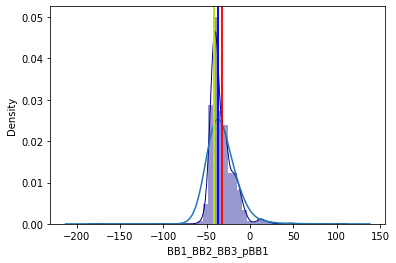

In [36]:
# # Density Plot and Histogram 
# l = []
# for item in BB1_BB2_BB3_pBB1_Hmapped_dihedral_all.values:
# #     l.append(int(item+180))

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt2 = sns.distplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt2.lines[0].get_xdata()
y = plt2.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt2.axvline(xmean,c='red')
plt2.axvline(xmedian,c='blue')
plt2.axvline(xmode,c='green')

# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all,bins=20)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all,bw=0.8)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_pBB1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  -49.65343908962628
parameter K is:  6.475296394204131


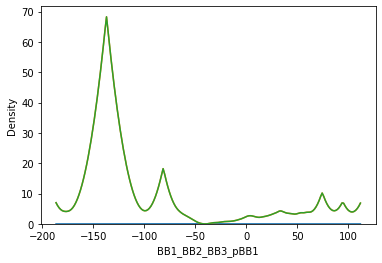

In [37]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_pBB1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-50, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: 125.81443523531738
BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all
Mean: Raw data -48.51410351718625
Mode: Raw data -93.96822634712916
Mode: Gauss-fitted -93.96822634712916


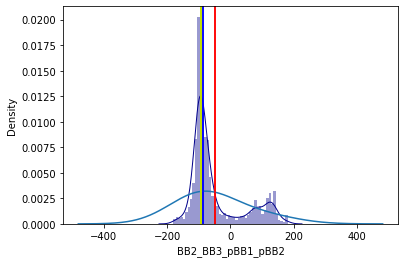

In [38]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])


# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -50.079261346484465
parameter K is:  1.1472305131193807


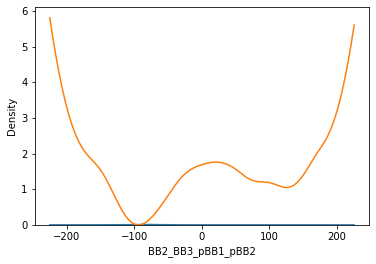

In [263]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_pBB1_pBB2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-50, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: 162.0468160662238
BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all
Mean: Raw data -73.47408533173461
Mode: Raw data -152.1750639400422
Mode: Gauss-fitted -152.1750639400422


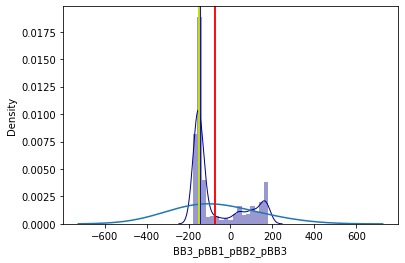

In [40]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
xmean = np.mean(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all,bw=1.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -47.14896761205481
parameter K is:  0.9569218957765898


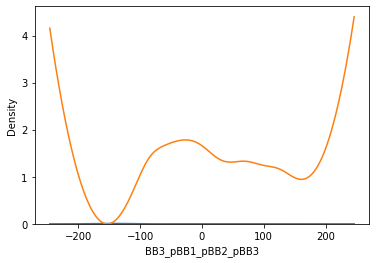

In [264]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_pBB2_pBB3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-50, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_ASC1_Hmapped_dihedral_all
Mean: Raw data -136.28956035171862
Mode: Raw data -136.24769963003456
Mode: Gauss-fitted -136.24769963003456


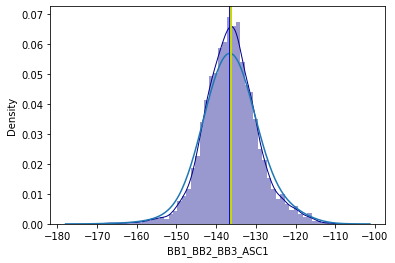

In [42]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_ASC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -140.9715020249993
parameter K is:  1.289207577364024


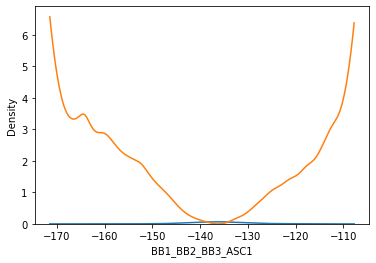

In [265]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_ASC1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-140, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: 139.17939706217217
BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all
Mean: Raw data -99.44916127098321
Mode: Raw data -143.66185712923465
Mode: Gauss-fitted -143.66185712923465


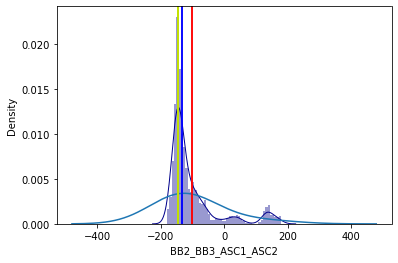

In [44]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  150.02543940289138
parameter K is:  1.1639317888684666


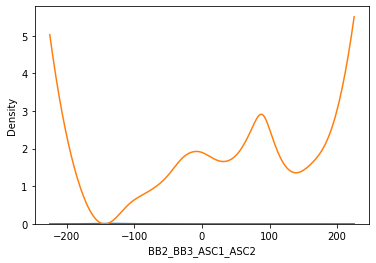

In [276]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_ASC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)


#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[150, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


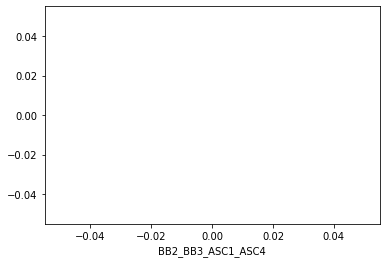

In [46]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

# x = plt.lines[0].get_xdata()
# y = plt.lines[0].get_ydata()
# maxid = np.argmax(y)
# xmode = x[maxid]
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
# import matplotlib.pyplot as plt
# ax = sns.kdeplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all,bw=0.5)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# x = ax.lines[0].get_xdata()
# y = ax.lines[0].get_ydata()
# maxid = np.argmax(y)
# plt.axvline(x[maxid],c='yellow')
# print("BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all")
# print("Mean: Raw data",xmean)
# print("Mode: Raw data",xmode)
# print("Mode: Gauss-fitted",x[maxid])


IndexError: list index out of range

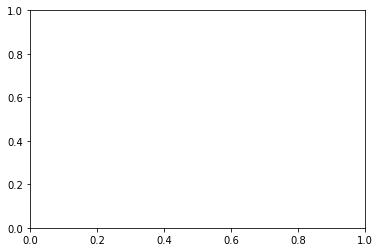

In [110]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_ASC1_ASC4_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-50, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all
Mean: Raw data 0.018335531574740216
Mode: Raw data 0.1698773688207158
Mode: Gauss-fitted 0.1698773688207158


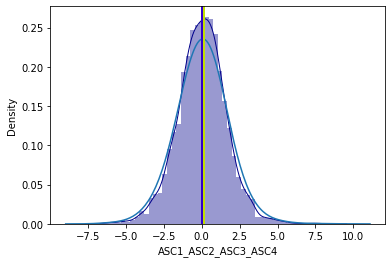

In [48]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all)
xmean = np.mean(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  1.0488733593021005
parameter K is:  1.4556218076601497


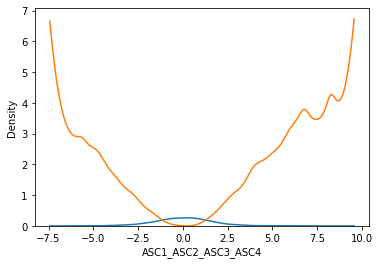

In [277]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_ASC3_ASC4_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[0, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_USC1_Hmapped_dihedral_all
Mean: Raw data -136.68073581135093
Mode: Raw data -135.34634650994246
Mode: Gauss-fitted -135.34634650994246


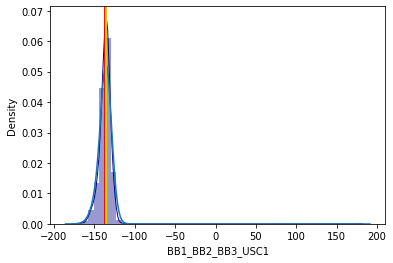

In [50]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_USC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_USC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_USC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


parameter R_o is:  -131.26652297273083
parameter K is:  284.66040253561636


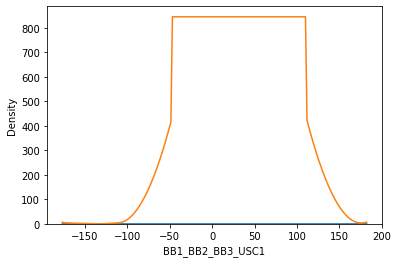

In [285]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_USC1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-131, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.9 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: 56.74593926800449
BB2_BB3_USC1_USC2_Hmapped_dihedral_all
Mean: Raw data -124.54179516386891
Mode: Raw data -142.49318721970928
Mode: Gauss-fitted -142.49318721970928


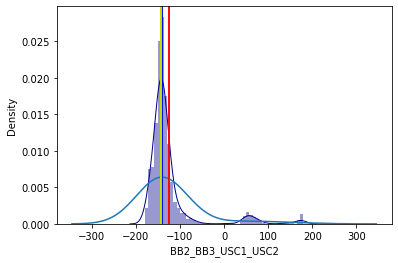

In [52]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all,bw=0.9)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_USC1_USC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

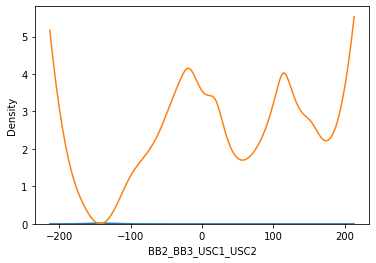

In [317]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_USC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-149, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_USC1_USC3_Hmapped_dihedral_all
Mean: Raw data 133.33742665867305
Mode: Raw data 133.53693511588918
Mode: Gauss-fitted 133.53693511588918


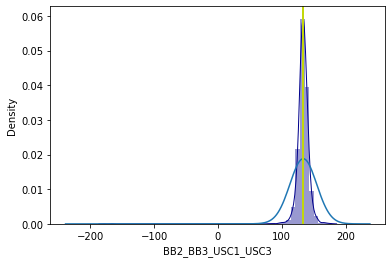

In [54]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all,bw=1.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_USC1_USC3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


parameter R_o is:  -148.13433107016678
parameter K is:  143.0142108335194


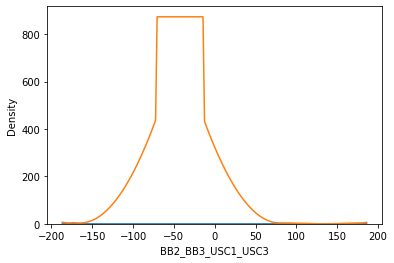

In [318]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 6
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_USC1_USC3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)

#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-150, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_GSC1_Hmapped_dihedral_all
Mean: Raw data -137.71618505195843
Mode: Raw data -138.8033725310705
Mode: Gauss-fitted -138.8033725310705


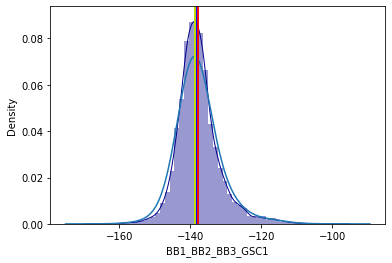

In [56]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_GSC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -141.87815521686576
parameter K is:  1.7224213437202676


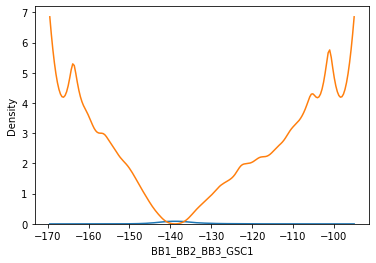

In [319]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_GSC1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-140, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: 63.66874152314284
third mode: 162.12790765328833
BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all
Mean: Raw data -61.15331794564348
Mode: Raw data -142.8553630425282
Mode: Gauss-fitted -142.8553630425282


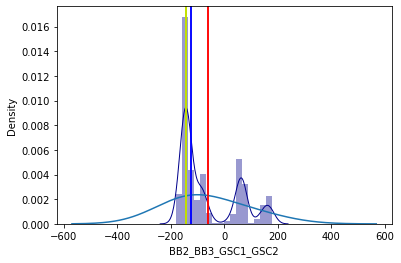

In [58]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<100):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>100 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("third mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all,bw=1.2)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -138.19760612135403
parameter K is:  0.9615775314742956


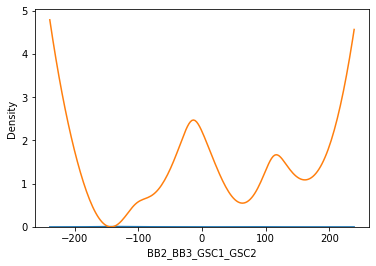

In [320]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_GSC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-140, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


second mode: -150.94643299125704
third mode: 71.46246056175721
BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all
Mean: Raw data 35.61147961630696
Mode: Raw data 71.46246056175721
Mode: Gauss-fitted 71.46246056175721


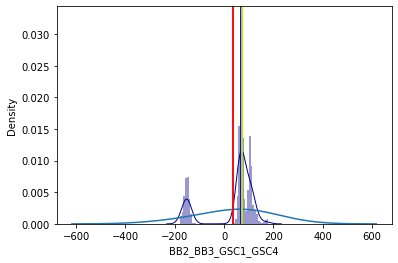

In [60]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>-200 and item<0):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("second mode:",x_new[np.argmax(y_new)])

#script for multimodal graphs
x_new = []
y_new = []
for item in x:
    if(item>0 and item<200):
        id = list(x).index(item)
        x_new.append(x[id])
        y_new.append(y[id])
#check the mode in the new partition:
print("third mode:",x_new[np.argmax(y_new)])

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all,bw=1.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

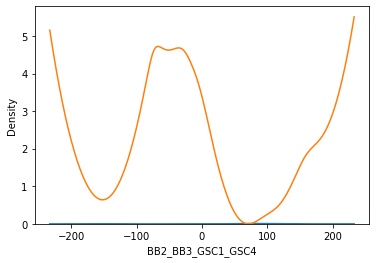

In [339]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_GSC1_GSC4_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-50, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all
Mean: Raw data -0.07404116706634692
Mode: Raw data 0.1449466525018881
Mode: Gauss-fitted 0.1449466525018881


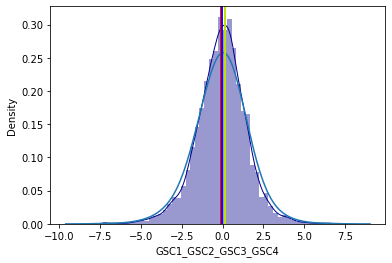

In [62]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all)
xmean = np.mean(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# #raw data plot
plt = sns.distplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -0.29172459646406046
parameter K is:  1.4677460284057051


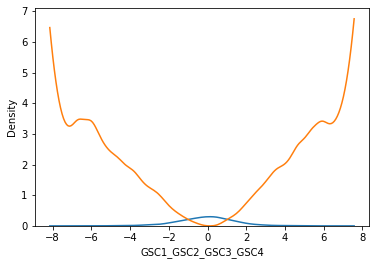

In [340]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_GSC3_GSC4_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[0, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_BB3_CSC1_Hmapped_dihedral_all
Mean: Raw data -135.4453904876099
Mode: Raw data -135.50450791986964
Mode: Gauss-fitted -135.50450791986964


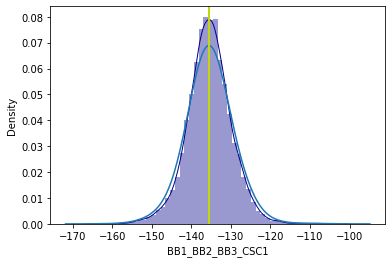

In [64]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all)
xmean = np.mean(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB1_BB2_BB3_CSC1_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -137.92325551575797
parameter K is:  1.5791212408682183


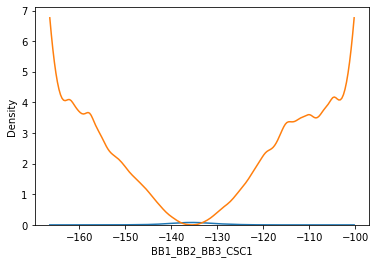

In [341]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 2
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_BB3_CSC1_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-135, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all
Mean: Raw data -148.46388069544366
Mode: Raw data -150.71269543592615
Mode: Gauss-fitted -150.71269543592615


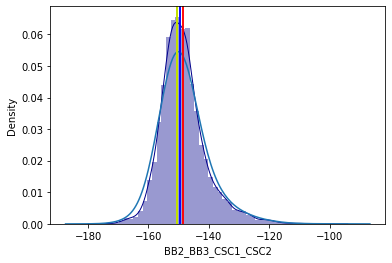

In [66]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  -150.2035478337943
parameter K is:  1.6033456553374776


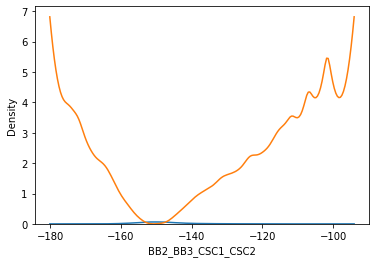

In [342]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 6
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_CSC2_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
#code to deal with innifite energy
if(U.max() == float('inf')):
    U2 = U
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[-150, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all
Mean: Raw data 145.8820535571543
Mode: Raw data 144.76741143782678
Mode: Gauss-fitted 144.76741143782678


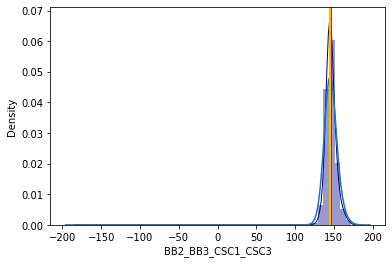

In [258]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xmean = np.mean(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all, kde=True, 
            color = 'darkblue',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all,bins=10)
# plt.axvline(xmean,c='red')
# plt.axvline(xmedian,c='blue')
# plt.axvline(xmode,c='green')

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all,bw=0.5)
plt.axvline(xmean,c='red')
plt.axvline(xmedian,c='blue')
plt.axvline(xmode,c='green')

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
plt.axvline(x[maxid],c='yellow')
print("BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


parameter R_o is:  149.94346316825897
parameter K is:  241.33694661527164


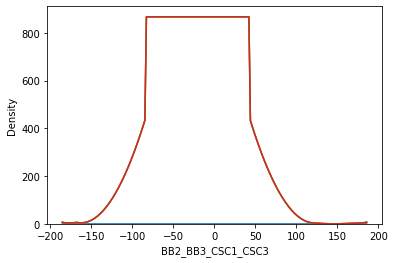

In [343]:
def harmonic_proper_dihedral(theta, theta0, k):
    n = 1
    coslist = []
    for t in theta:
        coslist.append(math.cos(n*t - theta0))
    final_coslist = np.array(coslist)
    val =  k * (1 + final_coslist)
    return val

#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_CSC1_CSC3_Hmapped_dihedral_all)
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()
#calculate energy
U = P2U(ydata)
# print(U)

if(U.max() == float('inf')):
    U2 = U.copy()
    t = np.sort(U2)[::-1]
    for x in t:
        if(x==float('inf')):
            continue
        else:
            second_largest = x
            break
    U[U==float('inf')]=(second_largest * 2)
else:
    U[U==float('inf')]=(U.max() * 2)

plt.plot(xdata,U)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

# for i in range(0,xdata.shape[0]):
params, pcov = curve_fit(harmonic_proper_dihedral, xdata,U,p0=[150, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])
# curve_fit(harmonic_angle, xdata[0], U, p0=[84, 1000])